In [1]:
import torch
print(torch.cuda.is_available())

True


In [2]:
import mne
import pandas as pd

eeg_file = "ds004121\sub-01\ses-01\eeg\sub-01_ses-01_task-DriveWithTaskAudio_run-1_eeg.set"
events_tsv = "ds004121\sub-01\ses-01\eeg\sub-01_ses-01_task-DriveWithTaskAudio_run-1_events.tsv"

raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
sfreq = raw.info['sfreq']
print(f"Sampling Rate: {sfreq}")

events_df = pd.read_csv(events_tsv, sep="\t")
events_df.dropna(subset=['onset'], inplace=True)

C:\Users\DELL\.conda\envs\pytorch\lib\site-packages\pymatreader\utils.py:179: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_32380\3482138207.py:7: RuntimeWarning: Unknown types found, setting as type EEG:
other: ['ANG', 'LN', 'SD', 'SP']
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Sampling Rate: 1024.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_32380\3482138207.py:7: RuntimeWarning: Not setting positions of 6 eog/misc channels found in montage:
['LHEOG', 'RHEOG', 'UVEOG', 'LVEOG', 'LMAST', 'RMAST']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


In [3]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 68 EEG, 4 EOG, 2 misc
 custom_ref_applied: False
 dig: 71 items (3 Cardinal, 68 EEG)
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 74
 projs: []
 sfreq: 1024.0 Hz
>

In [4]:
import numpy as np

if "sample" not in events_df.columns or events_df["sample"].isna().any():
    events_df["sample"] = (events_df["onset"] * sfreq).astype(int)

# Convert events to MNE format
events = np.column_stack((events_df["sample"].astype(int),
    np.zeros(len(events_df), dtype=int),
    events_df["value"].astype(int)))

In [5]:
on_task_codes = [1111, 1211, 1331, 1212, 1332]
mw_codes = [3111, 3310, 3312, 3200, 3112, 1341, 1342]

event_mapping = {}

# Map all task codes
for code in on_task_codes:
    event_mapping[code] = "on_task"
for code in mw_codes:
    event_mapping[code] = "mind_wandering"

events_df["event_label"] = events_df["value"].map(event_mapping)

# Drop unmapped codes
events_df = events_df.dropna(subset=["event_label"])

In [6]:
label_map = {'mind_wandering': 0, 'on_task': 1}
events_df['event_id'] = events_df['event_label'].map(label_map)

print(f"Total events: {len(events_df['event_id'])}, MW: {(events_df['event_id'] == 0).sum()}, On-Task: {(events_df['event_id'] == 1).sum()}")


Total events: 146, MW: 47, On-Task: 99


C:\Users\DELL\AppData\Local\Temp\ipykernel_32380\2108474051.py:15: RuntimeWarning: The unit for channel(s) ANG, LN, SD, SP has changed from V to NA.
  raw.set_channel_types(mapping)


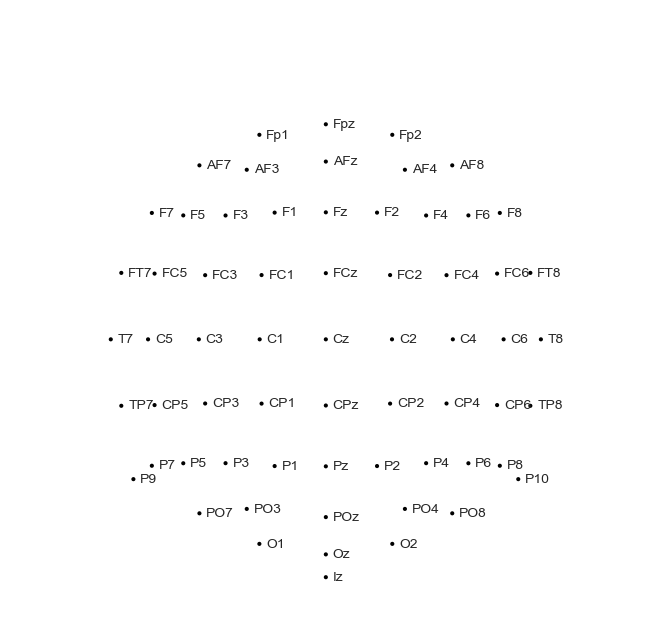

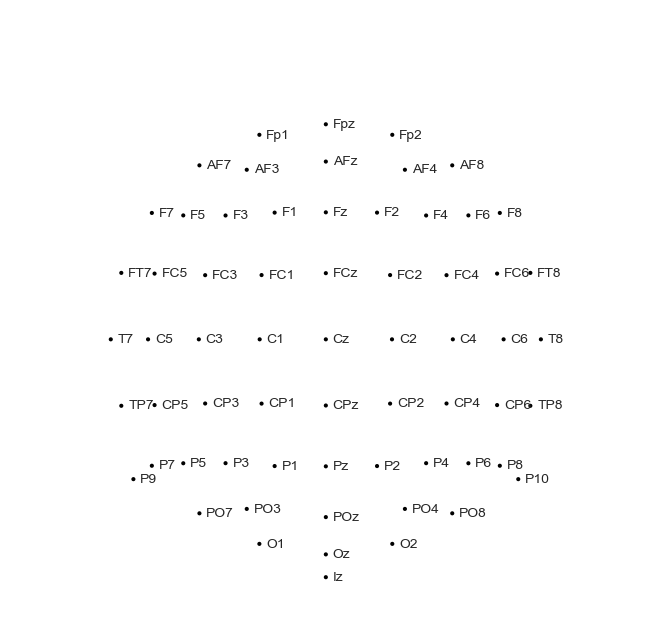

In [7]:
montage = mne.channels.make_standard_montage('biosemi64')

mapping = {
    'LHEOG': 'eog',
    'RHEOG': 'eog',
    'UVEOG': 'eog',
    'LVEOG': 'eog',
    'LMAST': 'misc',
    'RMAST': 'misc',
    'LN': 'misc',
    'ANG': 'misc',
    'SP': 'misc',
    'SD': 'misc'
}
raw.set_channel_types(mapping)
raw.set_montage(montage)
raw.plot_sensors(show_names=True)

In [8]:
events = np.column_stack((events_df["sample"].astype(int),
    np.zeros(len(events_df), dtype=int),
    events_df["event_id"].astype(int)))

Using matplotlib as 2D backend.


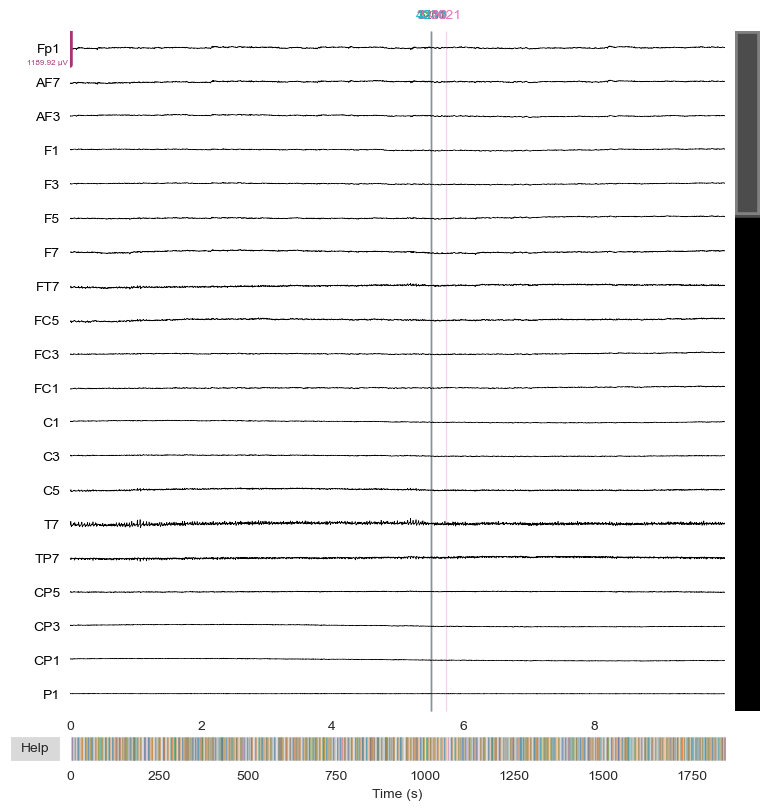

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


C:\Users\DELL\.conda\envs\pytorch\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


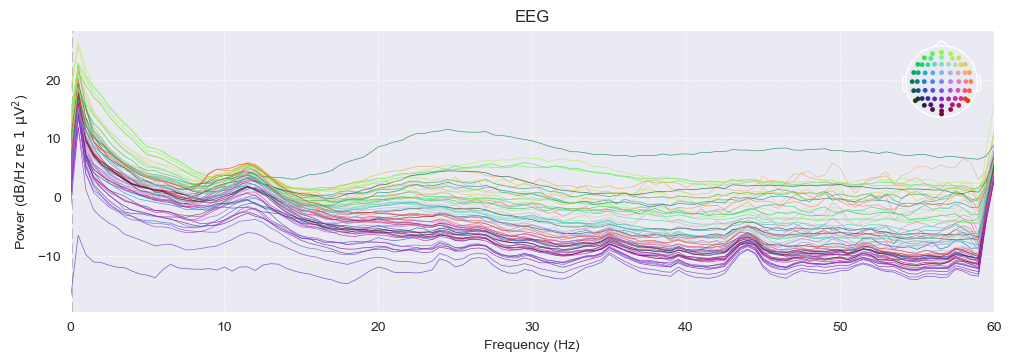

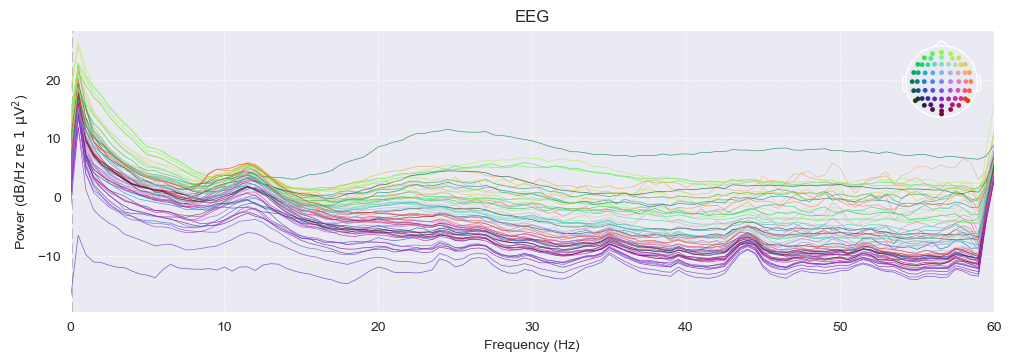

In [9]:
raw.plot(title="Raw EEG Data (Unfiltered)", scalings='auto')
raw.compute_psd(fmax = 60).plot()

In [10]:
raw.ch_names

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'LHEOG',
 'RHEOG',
 'UVEOG',
 'LVEOG',
 'LMAST',
 'RMAST',
 'LN',
 'ANG',
 'SP',
 'SD']

In [11]:
raw.resample(256, npad="auto")
# raw.crop(tmax=300) # not doing this shit

<RawEEGLAB | sub-01_ses-01_task-DriveWithTaskAudio_run-1_eeg.set, 74 x 472064 (1844.0 s), ~266.6 MiB, data loaded>

In [12]:
raw.pick_types(eeg=True, eog=True)  # only picking eeg and eog chanels
raw.filter(1.,30., fir_design='firwin') # bandpass filter
raw.notch_filter(freqs=[60]) # powerline noise

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition

<RawEEGLAB | sub-01_ses-01_task-DriveWithTaskAudio_run-1_eeg.set, 68 x 472064 (1844.0 s), ~245.0 MiB, data loaded>

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 60 components
Fitting ICA took 19.8s.
Using EOG channels: LHEOG, RHEOG, UVEOG, LVEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transitio

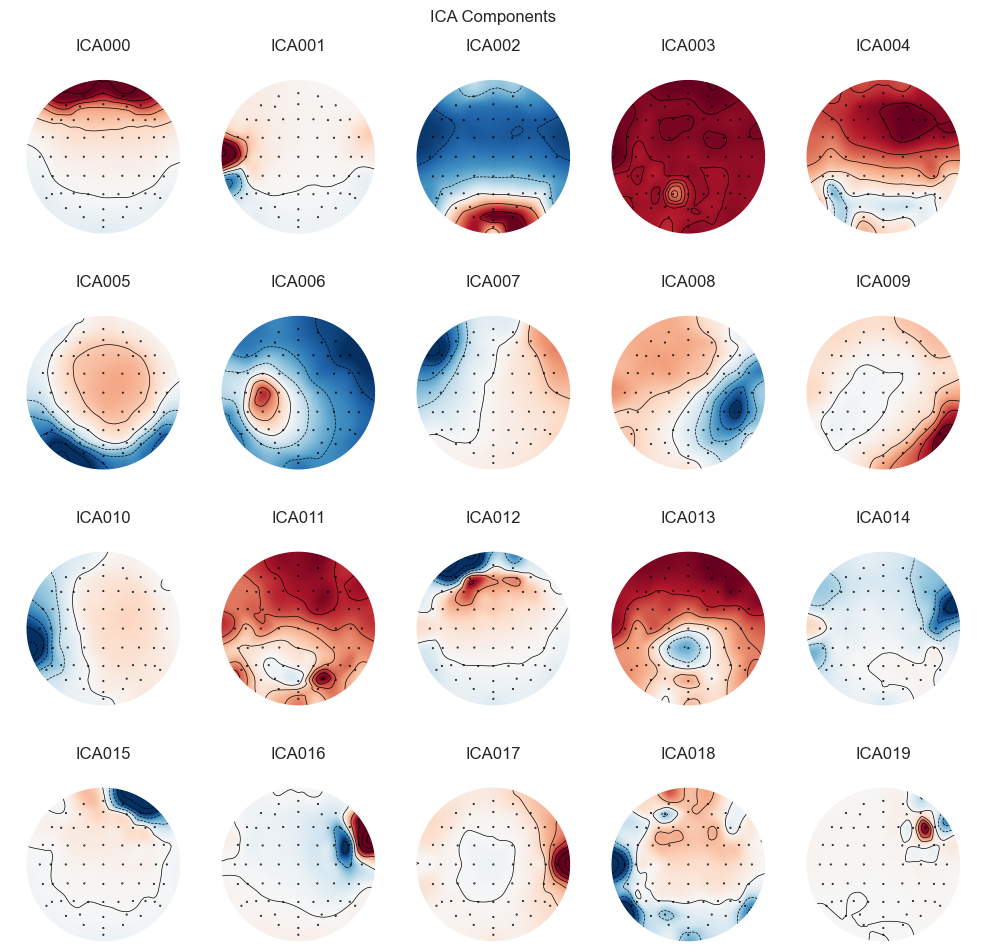

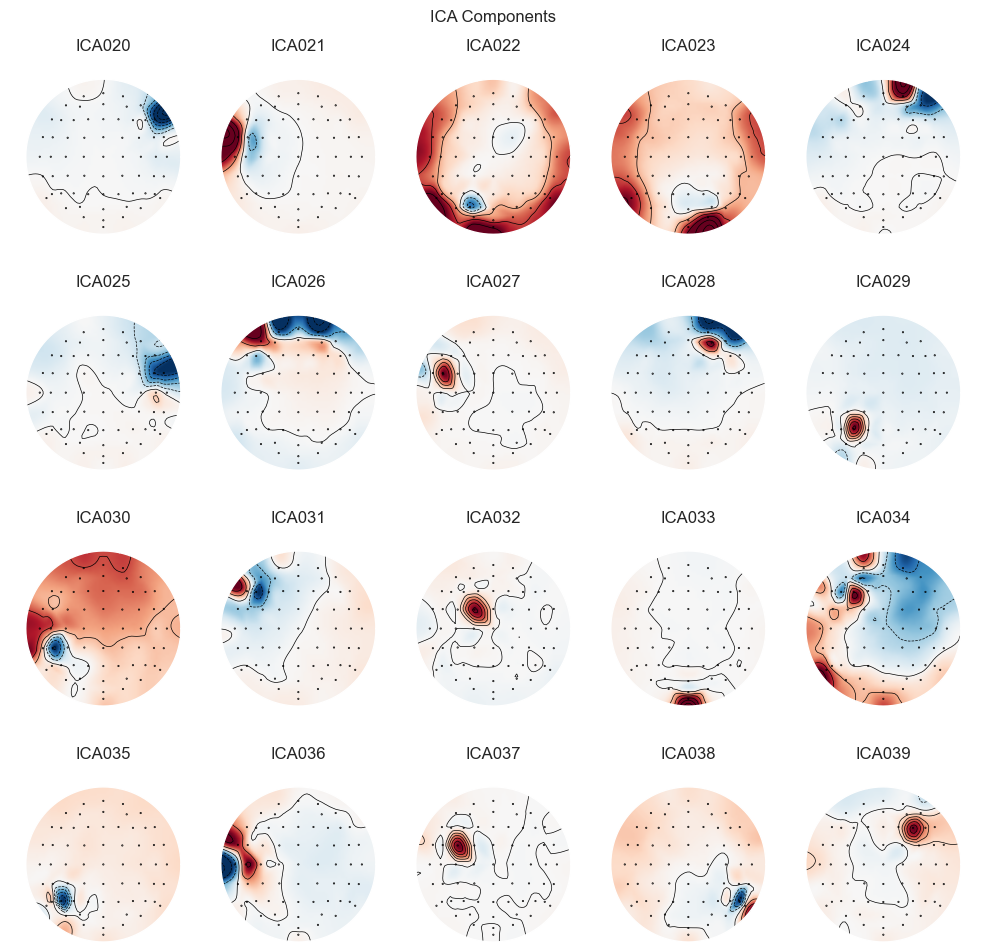

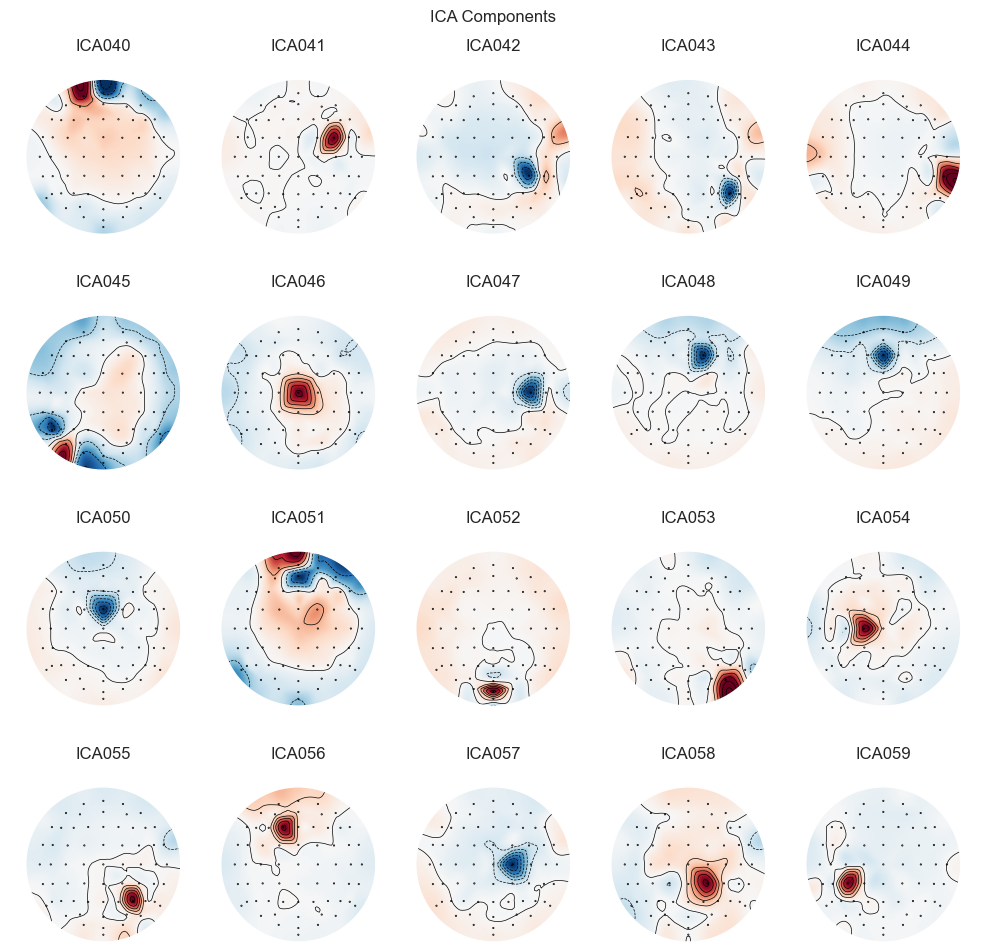

Applying ICA to Raw instance
    Transforming to ICA space (60 components)
    Zeroing out 5 ICA components
    Projecting back using 64 PCA components
Post removal EOG


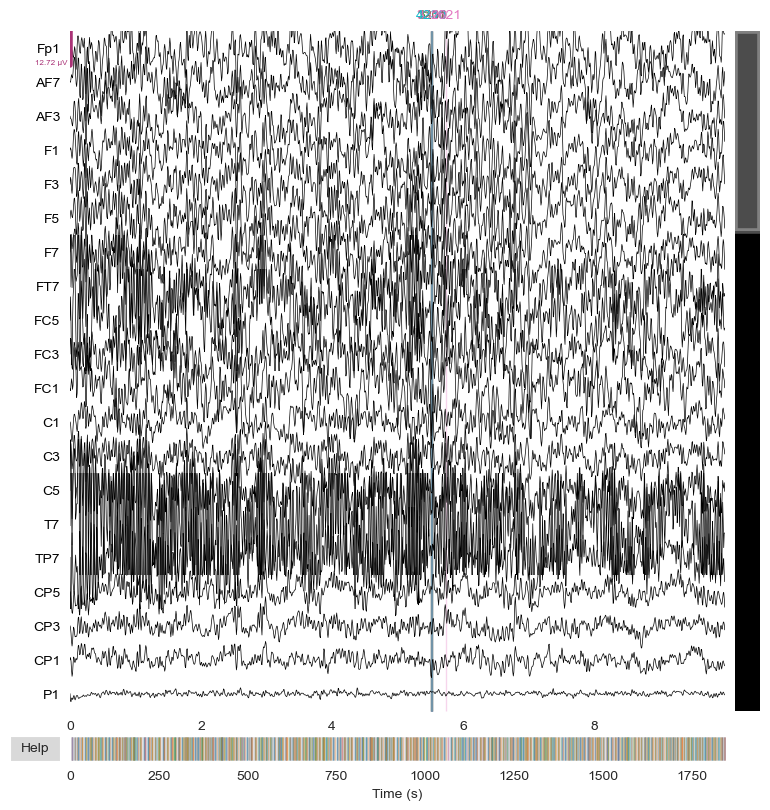

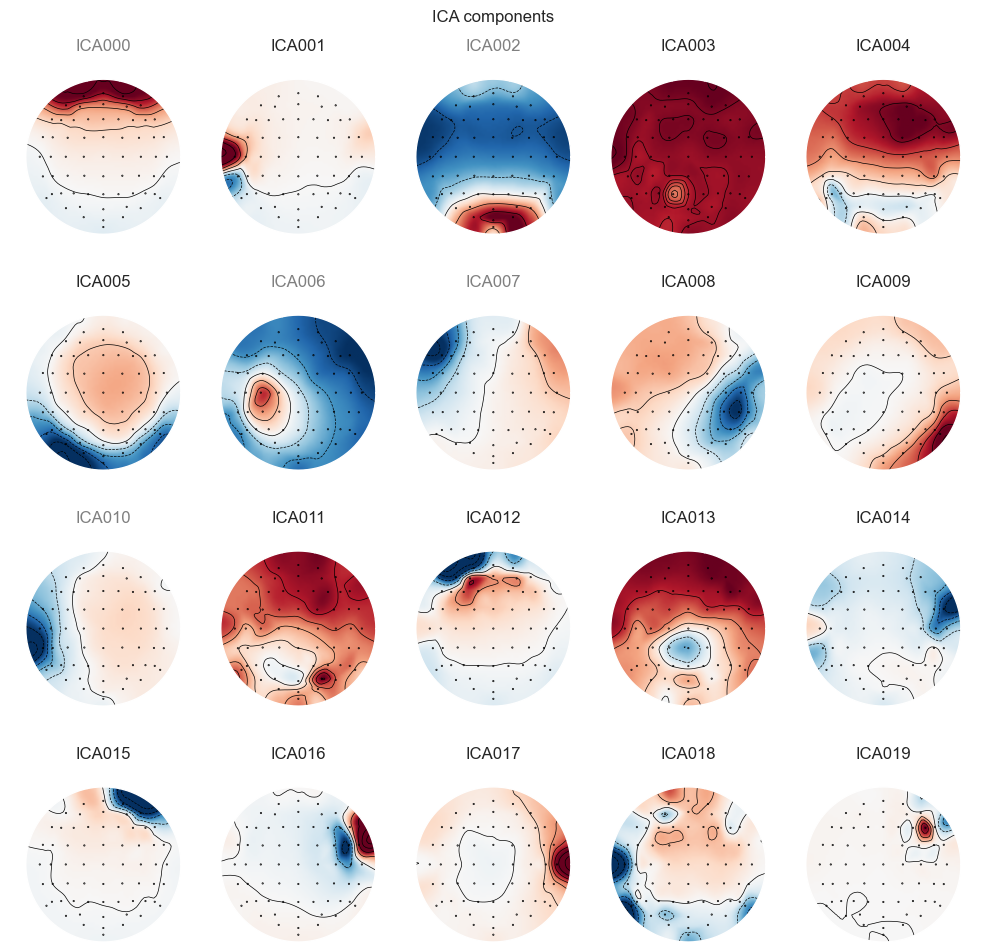

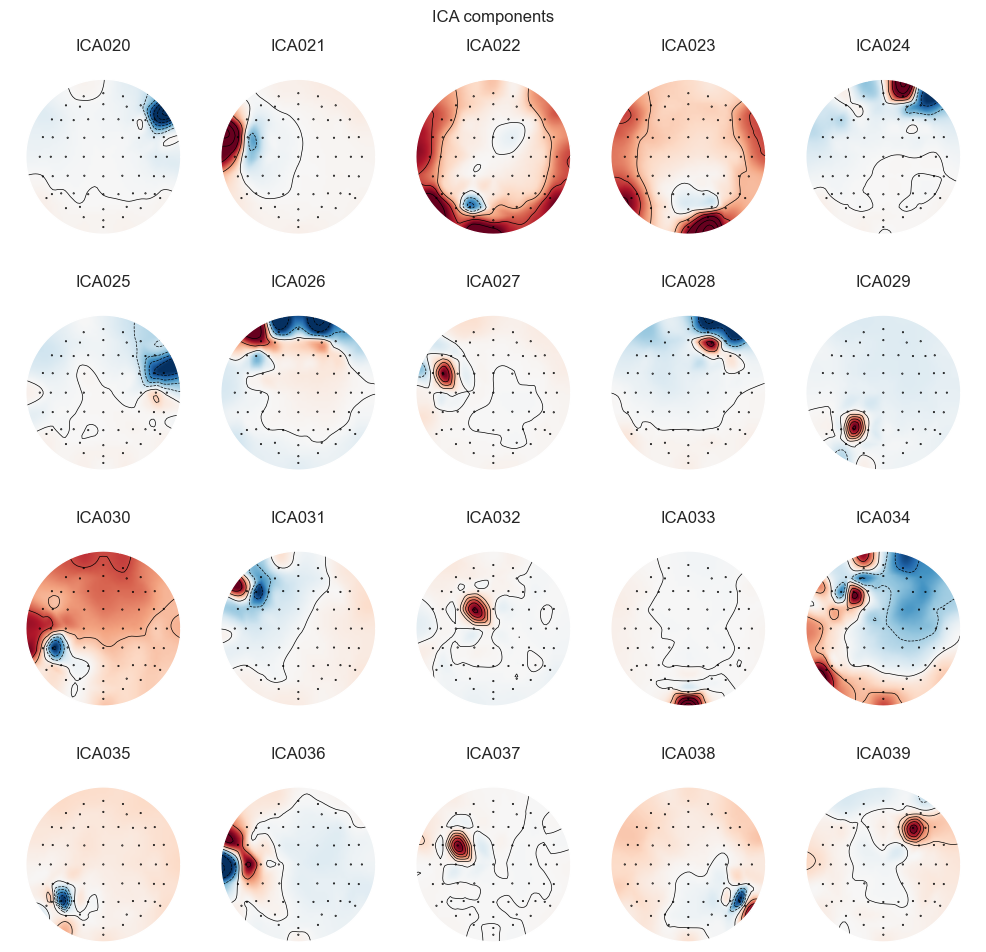

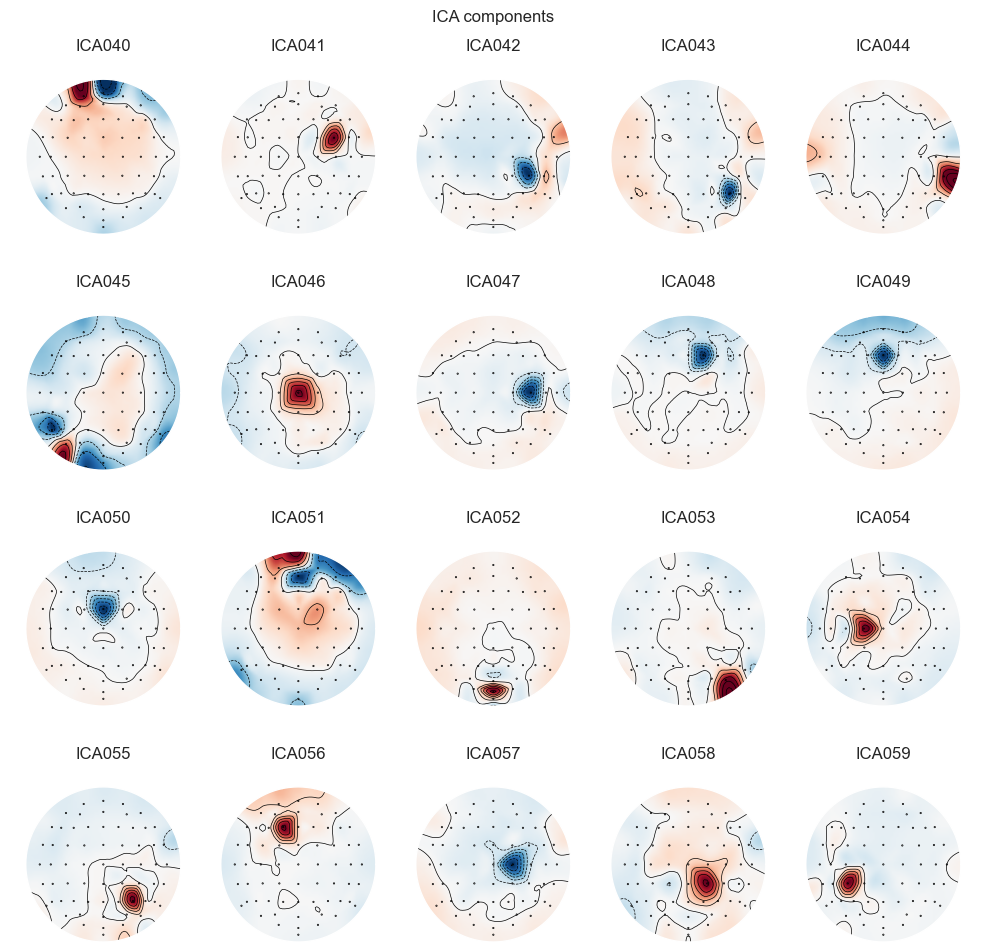

Ecluded 5 components


In [13]:
import matplotlib.pyplot as plt

ica = mne.preprocessing.ICA(n_components=60, random_state=42, max_iter="auto")
ica.fit(raw, picks='eeg')

eog_indices, scores = ica.find_bads_eog(raw, ch_name = ['LHEOG','RHEOG','UVEOG','LVEOG'])
# vialsuzing the compoenets, inspecting and marking them manually
print("Pre removal EOG")
ica.plot_components(title="ICA Components")

ica.exclude = eog_indices
ica.apply(raw)

print("Post removal EOG")
raw.plot(scalings = 'auto')
ica.plot_components()
print(f"Ecluded {len(eog_indices)} components")

In [14]:
raw.set_eeg_reference('average', projection=False)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEEGLAB | sub-01_ses-01_task-DriveWithTaskAudio_run-1_eeg.set, 68 x 472064 (1844.0 s), ~245.0 MiB, data loaded>

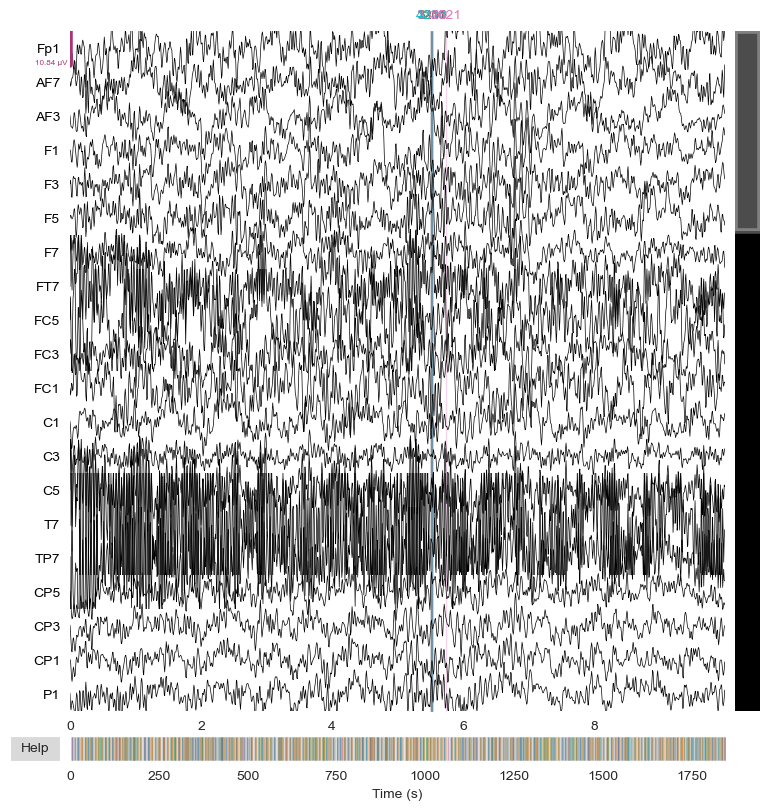

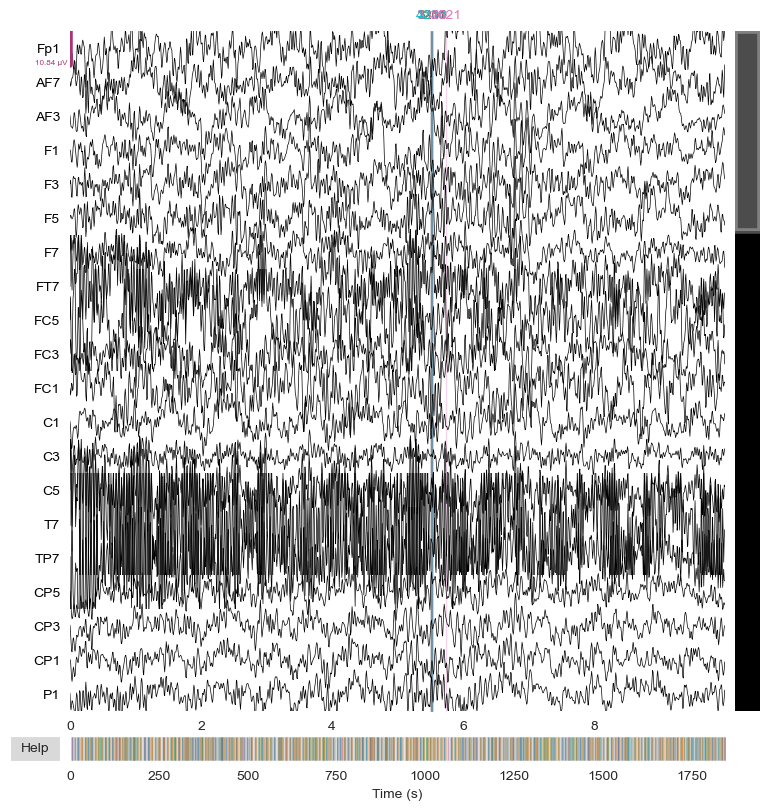

In [15]:
raw.plot(scalings = 'auto')

In [16]:
epochs = mne.Epochs(raw, events, event_id = label_map, tmin = -3.0, tmax = 2.0, preload = True, event_repeated = 'merge', baseline = (None,0))
epochs = epochs[[k for k in epochs.event_id.keys() if '/' not in k]]

Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
140 matching events found
Setting baseline interval to [-3.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 140 events and 1281 original time points ...
106 bad epochs dropped


In [17]:
data = epochs.get_data()
mean = data.mean(axis = (0,2), keepdims = True)
std = data.std(axis = (0,2), keepdims = True)
zscored = (data - mean) / std
epochs_standardized = epochs.copy()
epochs_standardized._data = zscored

In [18]:
epochs_standardized.apply_baseline(baseline=(-0.2, 0))

Applying baseline correction (mode: mean)


<Epochs | 34 events (all good), -3 – 2 s (baseline -0.2 – 0 s), ~22.7 MiB, data loaded,
 'mind_wandering': 10
 'on_task': 23
 'mind_wandering/on_task': 1>

In [19]:
freq_bands = {
    'delta': (1, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta':  (12, 30),
 }

psd = epochs.compute_psd(
    method='welch',
    fmin=1, fmax=30,
    n_fft=256,
    n_overlap=128,
    picks='eeg',
    verbose=False
)

psds, freqs = psd.get_data(return_freqs=True)
# psds.shape = (n_epochs, n_channels, n_freqs)
print(f"PSD shape: {psds.shape}, Frequencies: {freqs}")

X_bands = []

for band_name, (fmin, fmax) in freq_bands.items():
    band_mask = (freqs >= fmin) & (freqs <= fmax)
    band_power = psds[:, :, band_mask].mean(axis=2)
    X_bands.append(band_power)

# Concatenate all band features
X_psd = np.concatenate(X_bands, axis=1)

print("Feature matrix shape:", X_psd.shape)

PSD shape: (34, 64, 30), Frequencies: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
Feature matrix shape: (34, 256)


In [20]:
# Define frequencies for CWT
freqs = np.arange(1, 30, 1)
n_cycles = freqs / 2.  # More cycles for better frequency precision

# Compute time–frequency representation via Morlet wavelets
power = epochs.compute_tfr(
    method='morlet',
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=False,
    decim=2,
    n_jobs=-1,
)
print(power.data.shape)

X_wavelet_bands = []

for band_name, (fmin, fmax) in freq_bands.items():
    # Boolean mask of frequencies within the band
    fmask = (freqs >= fmin) & (freqs <= fmax)

    # Mean over frequencies and time
    band_power = power.data[:, :, fmask, :].mean(axis=(2, 3))

    X_wavelet_bands.append(band_power)

# Concatenate across all 4 bands → (n_epochs, n_channels * n_bands)
X_wavelet = np.concatenate(X_wavelet_bands, axis=1)

print("✅ Wavelet feature matrix shape:", X_wavelet.shape)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  62 out of  64 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    3.9s finished


(34, 64, 29, 641)
✅ Wavelet feature matrix shape: (34, 256)


In [21]:
X_combined = np.concatenate([X_psd, X_wavelet], axis=1)
X_combined.shape

(34, 512)

In [22]:
y = epochs.events[:, -1]